# <center>Stock Price Prediction</center>

## Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

pd.set_option('display.max_columns', None)

plt.style.use('ggplot')

## Initializing the dataframe

In [2]:
start = datetime.date(2005, 1, 1)
end = datetime.date.today()

In [3]:
df = yf.download(['MSFT'], start, end).reset_index()
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,26.799999,26.950001,26.650000,26.740000,18.695055,65002900
1,2005-01-04,26.870001,27.100000,26.660000,26.840000,18.764967,109442100
2,2005-01-05,26.840000,27.100000,26.760000,26.780001,18.723021,72463500
3,2005-01-06,26.850000,27.059999,26.639999,26.750000,18.702040,76890500
4,2005-01-07,26.820000,26.889999,26.620001,26.670000,18.646109,68723300


In [4]:
df.shape

(4799, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4.799000e+03
mean,92.968298,93.892609,92.028816,93.002765,87.191714,4.543122e+07
std,97.251363,98.235533,96.236536,97.293628,98.331124,2.840052e+07
min,15.200000,15.620000,14.870000,15.150000,11.304626,7.425600e+06
25%,27.690001,27.940001,27.435000,27.714999,20.739897,2.603165e+07
50%,41.480000,41.910000,41.169998,41.619999,35.739529,3.807860e+07
75%,122.405003,123.759998,120.975002,123.255001,117.642593,5.718170e+07
max,404.369995,407.010010,402.529999,404.869995,404.869995,5.910522e+08


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [10]:
df = df[['Date', 'Close']]
df.tail()

,Date,Close
4794,2024-01-22,396.510010
4795,2024-01-23,398.899994
4796,2024-01-24,402.559998
4797,2024-01-25,404.869995
4798,2024-01-26,403.929993


## Exploratory Data Analysis

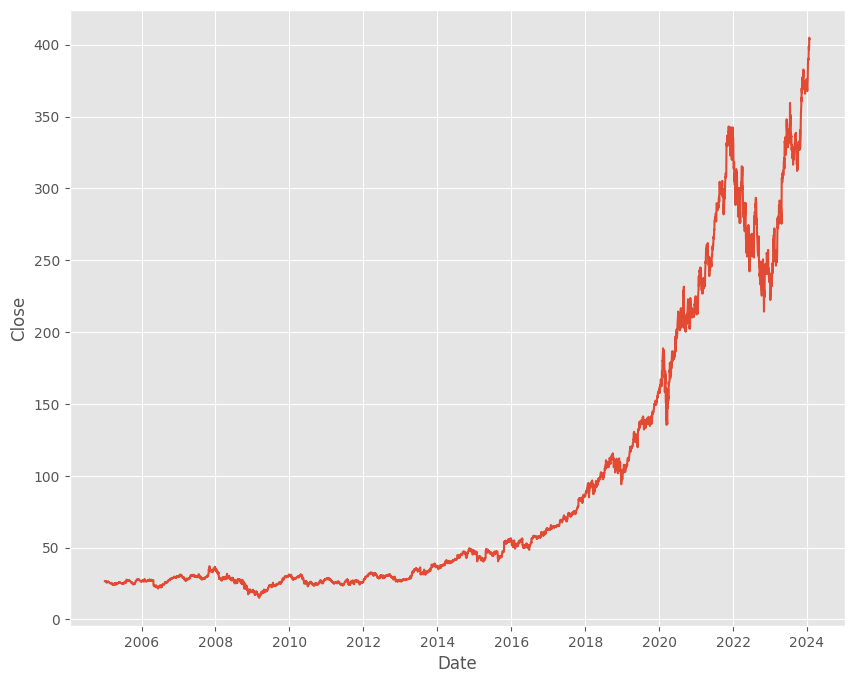

In [11]:
plt.figure(figsize=(10, 8))
sns.lineplot(y=df.Close, x=df.Date)
plt.show()

## Model Training

In [12]:
X = df['Date']
y = df['Close']

In [16]:
X = X.values.reshape(-1, 1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [18]:
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)